In [1]:
import QGL.config
QGL.config.AWGDir = "/tmp"
from QGL import *
output_notebook()
from auspex.qubit import *

Loading BokehJS ...

auspex-INFO: 2018-12-07 10:11:51,786 ----> using fake x6
auspex-WARNING: 2018-12-07 10:11:51,810 ----> Could not connect to Holzworths: No Holzworth devices found.
auspex-WARNING: 2018-12-07 10:11:52,014 ----> Could not load channelizer library; falling back to python methods.


In [2]:
cl = ChannelLibrary(db_resource_name=":memory:")
pl = PipelineManager()

q1 = cl.new_qubit("q1")
aps2_1 = cl.new_APS2("BBNAPS1", address="192.168.5.101") 
aps2_2 = cl.new_APS2("BBNAPS2", address="192.168.5.102")
dig_1  = cl.new_X6("X6_1", address=0)
h1 = cl.new_source("Holz1", "HolzworthHS9000", "HS9004A-009-1", power=-30)
h2 = cl.new_source("Holz2", "HolzworthHS9000", "HS9004A-009-2", power=-30) 
cl.set_control(q1, aps2_1, generator=h1)
cl.set_measure(q1, aps2_2, dig_1.ch("1"), generator=h2)
cl.set_master(aps2_1, aps2_1.ch("m2"))
cl["q1"].measure_chan.frequency = 0e6


In [3]:
pl.create_default_pipeline()
pl["q1"].clear_pipeline()
pl["q1"].set_stream_type("raw")
pl["q1"].create_default_pipeline()

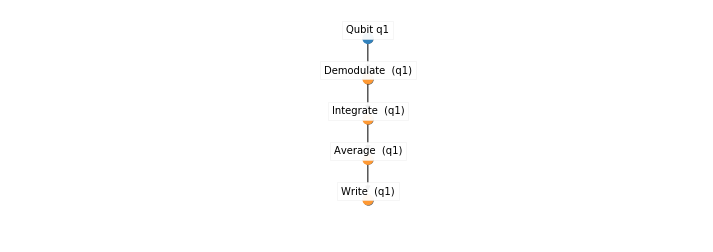

In [4]:
pl.show_pipeline()

In [5]:
pl["q1"]["Demodulate"]["Integrate"]["Average"].add(Display(label="PlotAverage"))

Display PlotAverage (q1)

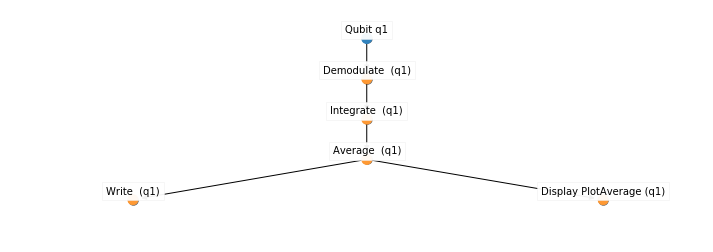

In [6]:
pl.show_pipeline()

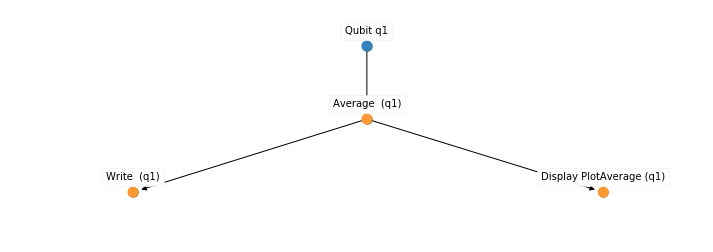

In [10]:
pl["q1"].clear_pipeline()
pl["q1"].set_stream_type("integrated")
pl["q1"].create_default_pipeline()
pl["q1"]["Average"].add(Display(label="PlotAverage"))
pl.show_pipeline()

In [7]:
mf = RabiAmp(cl["q1"], np.linspace(-1, 1, 51))
plot_pulse_files(mf)

Compiled 51 sequences.


In [11]:
exp = QubitExperiment(mf, averages=100)
exp.set_fake_data(cl["X6_1"], np.cos(np.linspace(-np.pi, np.pi, 51)))
exp.run_sweeps()

auspex-WARNING: 2018-12-07 10:13:01,408 ----> Could not load aps2 library
auspex-WARNING: 2018-12-07 10:13:01,411 ----> Could not load aps2 library
auspex-INFO: 2018-12-07 10:13:01,440 ----> Connection established to plot server.
auspex-WARNING: 2018-12-07 10:13:02,560 ----> Could not load x6 library
auspex-WARNING: 2018-12-07 10:13:02,563 ----> X6 GENERATING FAKE DATA
